<a href="https://colab.research.google.com/github/Tony-Y/oqmd-v1.2-dataset-for-cgnn/blob/main/OQMD_v1_2_dataset_for_CGNN_(SVG).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This notebook is a derivative work of [OQMD_v1_2_dataset_for_CGNN.ipynb](https://github.com/Tony-Y/oqmd-v1.2-dataset-for-cgnn/blob/main/OQMD_v1_2_dataset_for_CGNN.ipynb), and uses SVG instead of PNG to draw crystal graphs in "Gallery".**

The OQMD is a database of DFT calculated thermodynamic and structural properties of one million materials, created in Chris Wolverton's group at Northwestern University.

The OQMD v1.2 dataset for CGNN is downloadable from [this link](https://drive.google.com/file/d/1I6nS4l15SeX5S4VcU3jKG5Iqvomj7eXB/view?usp=sharing), which contains 561,888 materials. Its format is described in [here](https://github.com/Tony-Y/cgnn#dataset-files). The original data is available at [the OQMD website](https://oqmd.org/).

# The OQMD v1.2 Dataset

In [1]:
!wget -q "https://drive.google.com/uc?export=download&id=1I6nS4l15SeX5S4VcU3jKG5Iqvomj7eXB" -O oqmd.7z
!7z x -bsp0 -bso0 oqmd.7z

In [2]:
!ls oqmd_dataset

config.json	License		       split.json   targets.csv
graph_data.npz	oqmd_dataset_utils.py  summary.txt


In [3]:
!fmt oqmd_dataset/License

This work, "OQMD v1.2 for CGNN", is a derivative of "OQMD"
(https://oqmd.org) by Chris Wolverton's group at Northwestern University,
used under CC BY 4.0. "OQMD v1.2 for CGNN" © 2019 by Takenori Yamamoto
is licensed under CC BY 4.0. To view a copy of this license, visit
http://creativecommons.org/licenses/by/4.0/


In [4]:
!fmt oqmd_dataset/summary.txt


oqmd_data.py 562/562 [3:16:30<00:00, 19.71s/it]

mp_graph.py [Parallel(n_jobs=-1)]: Done 562 out of 562 | elapsed:
186.1min finished

oqmd.py Total Data: 561888 unique_z: 89 min z: 1 max z: 94 [ 1  2  3  4
5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70
 71 72 73 74 75 76 77 78 79 80 81 82 83 89 90 91 92 93 94]
Unary formulas: 89 Multi formulas: 338047 Train formulas: 270528 Val
formulas: 33804 Test formulas: 33804 Train: 449867 Val: 56289 Test: 55732



# Data Loading

In [5]:
import pandas as pd

dataset_path = "oqmd_dataset/targets.csv"
dataset = pd.read_csv(dataset_path, keep_default_na=False, na_values=['_'])
dataset.head()

,name,formula,spacegroup,nelements,nsites,energy_per_atom,formation_energy_per_atom,band_gap,volume_per_atom,magnetization_per_atom,atomic_volume_per_atom,volume_deviation
0,oqmd-823191,ZrZnNiMo,216,4,4,-6.399036,0.157939,0.0,16.014199,0.452473,22.799641,-0.423714
1,oqmd-362450,DySc2Ir,225,3,4,-6.795189,-0.266899,0.0,19.931045,0.212367,31.566053,-0.583763
2,oqmd-758369,YZr,59,2,16,-7.445319,0.060478,0.0,27.308156,0.002801,38.264481,-0.401211
3,oqmd-516941,CrMoAu2,225,3,4,-6.218335,0.504200,0.0,15.436073,0.715628,23.006243,-0.490421
4,oqmd-344596,Ge3O,221,2,4,-4.382844,0.215750,0.0,15.868661,0.000000,6.251735,0.606033


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f330ab9abd0>]],
      dtype=object)

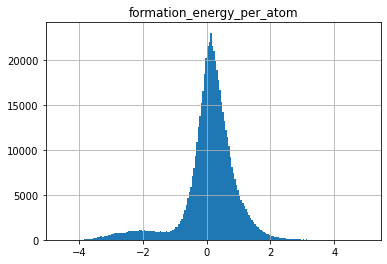

In [6]:
dataset.hist(column="formation_energy_per_atom", bins=200)

In [7]:
import json
config_path="oqmd_dataset/config.json"
with open(config_path) as f:
  config = json.load(f)

In [8]:
config.keys()

dict_keys(['node_vectors', 'atomic_numbers'])

In [9]:
for element_id in range(5):
  z = config["atomic_numbers"][element_id]
  v = config["node_vectors"][element_id]
  print(f'{z:2d} {v[:10]}')
print('')
for element_id in range(84,89):
  z = config["atomic_numbers"][element_id]
  v = config["node_vectors"][element_id]
  print(f'{z:2d} {v[79:]}')

 1 [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 2 [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 3 [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 4 [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 5 [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]

90 [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
91 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]
92 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]
93 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]
94 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]


Here is a graph loader for this dataset.

In [10]:
!cat oqmd_dataset/oqmd_dataset_utils.py

import numpy as np

def load_graph_data(graph_data_path):
  """
  This function loads graph data from the specified file.

  Example:
    >>> graphs = load_graph_data("oqmd_dataset/graph_data.npz")
    >>> oqmd_id = "oqmd-758369"
    >>> nodes, neighbors = graphs[oqmd_id]
    >>> nodes
    [38, 38, 38, 38, 38, 38, 38, 38, 39, 39, 39, 39, 39, 39, 39, 39]
    >>> neighbors
    [[1, 6, 6, 7, 7, 13, 13],
     [0, 0, 2, 7, 7, 11, 11, 13, 13, 14, 14],
     [1, 3, 3, 4, 4, 11, 11, 14, 14, 15, 15],
    ...
  """
  graphs = np.load(graph_data_path, allow_pickle=True, encoding='latin1')['graph_dict'].item()
  graphs = { k.decode() : v for k, v in graphs.items() }
  return graphs


Let's load all of the graph data in this dataset.

In [11]:
import sys

sys.path.append("oqmd_dataset")

from oqmd_dataset_utils import load_graph_data

graphs = load_graph_data("oqmd_dataset/graph_data.npz")

# Visualization of Crystal Graphs

Let's get a graph of the stablest structure of ZrO<sub>2</sub> in this dataset and draw it by using [Graphviz](https://graphviz.readthedocs.io/en/stable/).

In [12]:
formula0 = "ZrO2"

def get_subset(formula):
  return dataset[dataset["formula"] == formula].sort_values("formation_energy_per_atom")

oqmd_id = get_subset(formula=formula0)["name"].tolist()[0]
nodes, neighbors = graphs[oqmd_id]

In [13]:
oqmd_id

'oqmd-3278'

In [14]:
nodes

[7, 7, 7, 7, 7, 7, 7, 7, 39, 39, 39, 39]

In [15]:
neighbors

[[8, 9],
 [8, 9],
 [8, 9],
 [8, 9],
 [10, 11],
 [10, 11],
 [10, 11],
 [10, 11],
 [0, 1, 2, 3, 6, 9, 9, 10, 10, 11, 11],
 [0, 1, 2, 3, 5, 8, 8, 10, 10, 11, 11],
 [2, 4, 5, 6, 7, 8, 8, 9, 9, 11, 11],
 [1, 4, 5, 6, 7, 8, 8, 9, 9, 10, 10]]

In [16]:
dataset[dataset["name"] == oqmd_id]

,name,formula,spacegroup,nelements,nsites,energy_per_atom,formation_energy_per_atom,band_gap,volume_per_atom,magnetization_per_atom,atomic_volume_per_atom,volume_deviation
183001,oqmd-3278,ZrO2,14,2,12,-9.49757,-3.632982,3.843,11.965782,0.000015,12.514709,-0.045875


We extract element information from [mendeleev](https://github.com/lmmentel/mendeleev) because its installation fails in Colab notebooks.

In [17]:
!wget -q https://github.com/lmmentel/mendeleev/blob/master/mendeleev/elements.db?raw=true -O elements.db

In [18]:
from dataclasses import dataclass

@dataclass
class Element:
    symbol: float
    jmol_color: float

In [19]:
import sqlite3
dbname = 'elements.db'
conn = sqlite3.connect(dbname)
cur = conn.cursor()
cur.execute('SELECT atomic_number, symbol, jmol_color FROM elements')
element = dict()
for row in cur:
    element[row[0]] = Element(symbol=row[1], jmol_color=row[2])
conn.close()

In [20]:
import graphviz

In [21]:
dot = graphviz.Digraph(f'{oqmd_id}', comment=f'{formula0} in OQMD ({oqmd_id})', engine='neato')
dot.attr(overlap='false', size='6,6')

dot.attr('node', shape='circle', style='filled')
for i, element_id in enumerate(nodes):
  z = config["atomic_numbers"][element_id]
  e = element[z]
  dot.node(f'{i}', f'{e.symbol}@{i}', color=e.jmol_color)

dot.attr('edge', constraint='false', penwidth='2')
for i, element_id in enumerate(nodes):
  z = config["atomic_numbers"][element_id]
  e = element[z]
  for j in neighbors[i]:
    dot.edge(f'{i}', f'{j}', color=e.jmol_color)


In [22]:
# print(dot.source)

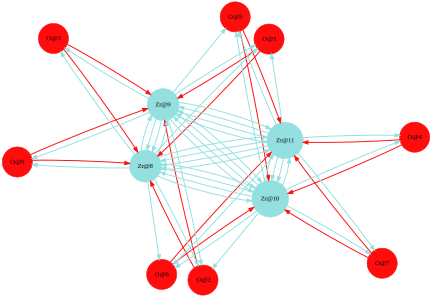

In [23]:
dot

# Original Data and Structures

We can obtain the original data from the online database by using the OQMD API.

In [24]:
import json, requests

def get_oqmd_entry(entry_id):
  base_url = 'http://oqmd.org/oqmdapi/entry'
  url = f'{base_url}/{entry_id}'

  response = requests.get(url)
  if response.status_code != 200:
    print('Status code:', response.status_code)
    print('You can see its meaning at https://developer.mozilla.org/en-US/docs/Web/HTTP/Status')
  else:
    response = json.loads(response.text)
    return response

In [25]:
entry_id = int(oqmd_id.split('-')[1])
get_oqmd_entry(entry_id)

{'band_gap': 3.843,
 'calculations': [{'id': 37919,
   'label': 'standard',
   'path': '/home/oqmd/libraries/icsd/15983/standard'},
  {'id': 801995,
   'label': 'static',
   'path': '/home/oqmd/libraries/icsd/15983/static'},
  {'id': 1988392,
   'label': 'relaxation_lda',
   'path': '/home/oqmd/libraries/icsd/15983/relaxation_lda'},
  {'id': 1997902,
   'label': 'static_lda',
   'path': '/home/oqmd/libraries/icsd/15983/static_lda'}],
 'composition': 'O2 Zr1',
 'composition_generic': 'AB2',
 'energy_per_atom': -9.49757019,
 'formation_energy': -3.63298243058584,
 'holds': [],
 'icsd_id': '15983',
 'id': 3278,
 'keywords': ['icsd'],
 'name': 'ZrO2',
 'natoms': 12,
 'ntypes': 2,
 'path': '/home/oqmd/libraries/icsd/15983',
 'prototype': 'ZrO2(mP)',
 'sites': None,
 'spacegroup': None,
 'stability': -0.4717609644791705,
 'unit_cell': None,
 'volume': None}

We could not get the crystal structure of ZrO<sub>2</sub> from the online database, but an entry of Ge<sub>3</sub>O appears with the structure as the following:

In [26]:
get_oqmd_entry(entry_id=344596)

{'band_gap': 0.0,
 'calculations': [{'id': 352471,
   'label': 'initialize',
   'path': '/home/oqmd/libraries/prototypes/binaries/L1_2/O_Ge/initialize'},
  {'id': 352472,
   'label': 'coarse_relax',
   'path': '/home/oqmd/libraries/prototypes/binaries/L1_2/O_Ge/coarse_relax'},
  {'id': 352473,
   'label': 'fine_relax',
   'path': '/home/oqmd/libraries/prototypes/binaries/L1_2/O_Ge/fine_relax'},
  {'id': 352474,
   'label': 'standard',
   'path': '/home/oqmd/libraries/prototypes/binaries/L1_2/O_Ge/standard'},
  {'id': 1253775,
   'label': 'static',
   'path': '/home/oqmd/libraries/prototypes/binaries/L1_2/O_Ge/static'},
  {'id': 1253776,
   'label': 'relaxation',
   'path': '/home/oqmd/libraries/prototypes/binaries/L1_2/O_Ge/relaxation'}],
 'composition': 'Ge3 O1',
 'composition_generic': 'AB3',
 'energy_per_atom': -4.382843515,
 'formation_energy': 0.21574978978031,
 'holds': [],
 'icsd_id': None,
 'id': 344596,
 'keywords': ['prototype', 'L1_2'],
 'name': 'Ge3O',
 'natoms': 4,
 'ntype

Alternatively, we can use another structure database to get the structure of ZrO<sub>2</sub> as the following:

In [27]:
import json, requests

base_url = 'http://oqmd.org/optimade/structures'
url = f'{base_url}?filter=chemical_formula_descriptive="{formula0}"'
# If you want to know details of "chemical_formula_descriptive", see the link below:
# https://github.com/Materials-Consortia/OPTIMADE/blob/v1.0/optimade.rst#id65

response = requests.get(url)
if response.status_code != 200:
  print('Status code:', response.status_code)
  print('You can see its meaning at https://developer.mozilla.org/en-US/docs/Web/HTTP/Status')
else:
  response = json.loads(response.text)
  if 'detail' in response.keys():
    print(response['detail'])
  else:
    print('Meta data:')
    display(response['meta'])

Meta data:


{'_oqmd_data_in_response': 35,
 'api_version': '1.0.0',
 'data_available': 1022603,
 'data_returned': 35,
 'more_data_available': False,
 'provider': {'description': 'The Open Quantum Materials Database',
  'homepage': 'http://oqmd.org',
  'name': 'OQMD',
  'prefix': 'oqmd'},
 'query': {'_oqmd_final_query': "( composition__formula__in=['O2 Zr1'] )",
  'representation': 'http://oqmd.org/optimade/structures?filter=chemical_formula_descriptive=%22ZrO2%22'},
 'response_message': 'OK',
 'time_stamp': '2022-03-26 21:05:29',
 'warnings': []}

In [28]:
response['data'][0].keys()

dict_keys(['id', 'type', 'attributes'])

We retrieve the structure with the wanted entry id from the database response. 

In [29]:
entry_structure = None
for x in response['data']:
  x = x['attributes']
  if x['_oqmd_entry_id'] == entry_id:
    entry_structure = x
    break

if entry_structure == None:
  print(f'No structure for the entry {entry_id}')

In [30]:
entry_structure

{'_oqmd_band_gap': 3.843,
 '_oqmd_calculation_id': 801995,
 '_oqmd_delta_e': -3.633,
 '_oqmd_entry_id': 3278,
 '_oqmd_icsd_id': 15983,
 '_oqmd_prototype': 'ZrO2(mP)',
 '_oqmd_spacegroup': 'P21/c',
 '_oqmd_stability': 0.0,
 '_oqmd_volume': 143.589,
 'cartesian_site_positions': [[2.36194, 1.27627, 0.13447],
  [0.42102, 3.5834, 0.73934],
  [5.20898, 0.97766, 1.92667],
  [3.26807, 3.88201, 2.53154],
  [2.80732, 1.32948, 2.79231],
  [0.8664, 4.23383, 3.39718],
  [5.65436, 1.62809, 4.58451],
  [3.71345, 3.93522, 5.18937],
  [3.94249, 2.38202, 1.13006],
  [1.68751, 4.98776, 1.53595],
  [4.38787, 0.22372, 3.7879],
  [2.13289, 2.82946, 4.19379]],
 'chemical_formula_anonymous': 'A2B',
 'chemical_formula_descriptive': 'O2Zr',
 'chemical_formula_reduced': 'O2Zr',
 'elements': ['O', 'Zr'],
 'last_modified': None,
 'lattice_vectors': [[5.18462, 0.0, 0.008175],
  [0.0, 5.211486, 0.0],
  [0.890761, 0.0, 5.315677]],
 'nelements': 2,
 'nperiodic_dimensions': 3,
 'nsites': 12,
 'species_at_sites': ['O',


There are many visualization softwares for chemical structrues in 3D: [Jmol](http://jmol.sourceforge.net), [VESTA](http://jp-minerals.org/vesta/en/), etc.
You can visualize the crystal structure of ZrO2 by using this information, that is, cartesian_site_positions, lattice_vectors, and species_at_sites.

In [31]:
n = entry_structure['nsites']
print(n)
print(f'{formula0} {oqmd_id} in XYZ format')
for i in range(n):
  s = entry_structure['species_at_sites'][i]
  x, y, z = entry_structure['cartesian_site_positions'][i]
  print(f'{s:2s} {x:10.6f} {y:10.6f} {z:10.6f}')

12
ZrO2 oqmd-3278 in XYZ format
O    2.361940   1.276270   0.134470
O    0.421020   3.583400   0.739340
O    5.208980   0.977660   1.926670
O    3.268070   3.882010   2.531540
O    2.807320   1.329480   2.792310
O    0.866400   4.233830   3.397180
O    5.654360   1.628090   4.584510
O    3.713450   3.935220   5.189370
Zr   3.942490   2.382020   1.130060
Zr   1.687510   4.987760   1.535950
Zr   4.387870   0.223720   3.787900
Zr   2.132890   2.829460   4.193790


In [32]:
for i in range(3):
  x, y, z = entry_structure['lattice_vectors'][i]
  print(f'{x:10.6f} {y:10.6f} {z:10.6f}')

  5.184620   0.000000   0.008175
  0.000000   5.211486   0.000000
  0.890761   0.000000   5.315677


# Gallery

We first define some useful functions for drawing graphs.

In [33]:
!pip install svgutils

In [34]:
import svgutils

def square_image(data, length=100):
  svg = svgutils.transform.fromstring(data.decode())
  svg.set_size((f'{length}pt', f'{length}pt'))
  return svg.to_str()

In [35]:
def gen_graph_image(oqmd_id, size=4, bgcolor='transparent'):
  nodes, neighbors = graphs[oqmd_id]

  dot = graphviz.Digraph(f'{oqmd_id}', comment=f'{oqmd_id}', engine='neato')
  dot.attr(overlap='false', size=f'{size}', bgcolor=bgcolor)

  dot.attr('node', shape='circle', style='filled')
  for i, element_id in enumerate(nodes):
    z = config["atomic_numbers"][element_id]
    e = element[z]
    dot.node(f'{i}', f'{e.symbol}', color=e.jmol_color)

  dot.attr('edge', constraint='false', penwidth='2')
  for i, element_id in enumerate(nodes):
    z = config["atomic_numbers"][element_id]
    e = element[z]
    for j in neighbors[i]:
      dot.edge(f'{i}', f'{j}', color=e.jmol_color)

  return dot.pipe(format='svg')

In [36]:
from ipywidgets import Box, HBox, VBox, Image, HTML, Layout

def gen_boxes(formula, length=100, max_num_boxes=5, bgcolor='white'):
  oqmd_ids = get_subset(formula=formula)["name"].tolist()

  boxes = []
  for x in oqmd_ids[:max_num_boxes]:
    image = gen_graph_image(oqmd_id=x)
    box = HTML(square_image(image, length=length))
    css = HTML('<style> .svg{ background-color:' + f'{bgcolor}' + ';} </style>')
    box.add_class('svg')
    h = HTML(value=x)
    vb = VBox([h, Box([css, box])])
    vb.layout.align_items = 'center'
    vb.layout.border = '1px solid gray'
    boxes.append(vb)
  return boxes

In [37]:
def show_table_and_graphs(formula, bgcolor='white'):
  display(get_subset(formula))
  hb = HBox(gen_boxes(formula, length=150, bgcolor=bgcolor))
  display(hb)

## Jadeite

https://en.wikipedia.org/wiki/Jadeite

In [38]:
show_table_and_graphs(formula='NaAl(SiO3)2') # Jadeite

,name,formula,spacegroup,nelements,nsites,energy_per_atom,formation_energy_per_atom,band_gap,volume_per_atom,magnetization_per_atom,atomic_volume_per_atom,volume_deviation
445264,oqmd-2688,NaAl(SiO3)2,15,4,20,-7.30066,-3.00721,5.633,10.024731,0.0,4.985015,0.502728


## Benitoite

https://en.wikipedia.org/wiki/Benitoite

In [39]:
show_table_and_graphs(formula='BaTi(SiO3)3') # Benitoite

,name,formula,spacegroup,nelements,nsites,energy_per_atom,formation_energy_per_atom,band_gap,volume_per_atom,magnetization_per_atom,atomic_volume_per_atom,volume_deviation
527844,oqmd-3694,BaTi(SiO3)3,188,4,28,-7.946506,-3.18894,3.113,13.336027,0.000125,8.001868,0.399981


## Taaffeite

https://en.wikipedia.org/wiki/Taaffeite

In [40]:
show_table_and_graphs(formula='MgBeAl4O8') # Taaffeite

,name,formula,spacegroup,nelements,nsites,energy_per_atom,formation_energy_per_atom,band_gap,volume_per_atom,magnetization_per_atom,atomic_volume_per_atom,volume_deviation
363421,oqmd-44418,MgBeAl4O8,186,4,56,-7.206451,-3.17309,5.873,8.875545,0.0,3.563588,0.598494


## Kettnerite

https://www.mindat.org/min-2190.html

In [41]:
show_table_and_graphs(formula='CaBiCO4F')

,name,formula,spacegroup,nelements,nsites,energy_per_atom,formation_energy_per_atom,band_gap,volume_per_atom,magnetization_per_atom,atomic_volume_per_atom,volume_deviation
340755,oqmd-20108,CaBiCO4F,54,5,32,-6.729267,-2.381276,2.925,11.995659,0.0,5.782002,0.517992
270761,oqmd-15534,CaBiCO4F,59,5,16,-6.562982,-2.214990,0.949,12.249077,0.0,5.782002,0.527964


## Li-Na-K carbonates

### Lithium carbonate

https://en.wikipedia.org/wiki/Lithium_carbonate

In [42]:
show_table_and_graphs(formula='Li2CO3') # Lithium carbonate

,name,formula,spacegroup,nelements,nsites,energy_per_atom,formation_energy_per_atom,band_gap,volume_per_atom,magnetization_per_atom,atomic_volume_per_atom,volume_deviation
397777,oqmd-3549,Li2CO3,15,3,12,-6.540866,-2.110837,5.172,9.530431,0.0,6.944641,0.271319
269017,oqmd-16579,Li2CO3,193,3,12,-6.464600,-2.034571,3.704,7.701887,0.0,6.944641,0.098320


### Sodium carbonate

https://en.wikipedia.org/wiki/Sodium_carbonate

In [43]:
show_table_and_graphs(formula='Na2CO3') # Sodium carbonate

,name,formula,spacegroup,nelements,nsites,energy_per_atom,formation_energy_per_atom,band_gap,volume_per_atom,magnetization_per_atom,atomic_volume_per_atom,volume_deviation
16488,oqmd-644611,Na2CO3,12,3,12,-6.171835,-1.974273,4.335,11.178730,0.0,10.018566,0.103783
170605,oqmd-14595,Na2CO3,194,3,12,-6.158762,-1.961201,3.586,12.021798,0.0,10.018566,0.166633


### Potassium carbonate

https://en.wikipedia.org/wiki/Potassium_carbonate

In [44]:
show_table_and_graphs(formula='K2CO3') # Potassium carbonate

,name,formula,spacegroup,nelements,nsites,energy_per_atom,formation_energy_per_atom,band_gap,volume_per_atom,magnetization_per_atom,atomic_volume_per_atom,volume_deviation
337133,oqmd-1755,K2CO3,15,3,12,-6.144577,-1.981184,4.078,15.662823,0.0,20.476449,-0.307328
303997,oqmd-2683,K2CO3,14,3,24,-6.142346,-1.978952,4.356,15.314051,0.0,20.476449,-0.337102
356654,oqmd-646936,K2CO3,194,3,12,-6.136425,-1.973031,3.662,16.040976,0.0,20.476449,-0.276509


### Lithium sodium carbonate

In [45]:
show_table_and_graphs(formula='NaLiCO3') # Lithium sodium carbonate

,name,formula,spacegroup,nelements,nsites,energy_per_atom,formation_energy_per_atom,band_gap,volume_per_atom,magnetization_per_atom,atomic_volume_per_atom,volume_deviation
42195,oqmd-70795,NaLiCO3,174,4,54,-6.365491,-2.051695,4.913,10.655306,0.0,8.481603,0.204002
537483,oqmd-15829,NaLiCO3,174,4,18,-6.347711,-2.033916,4.587,10.128962,0.0,8.481603,0.162638
213833,oqmd-78326,NaLiCO3,174,4,18,-6.339666,-2.025871,4.953,10.401726,0.0,8.481603,0.184597
76365,oqmd-44504,NaLiCO3,38,4,18,-4.885046,-0.571250,0.000,11.323354,0.0,8.481603,0.250964


### Lithium potassium carbonate

In [46]:
show_table_and_graphs(formula='KLiCO3') # Lithium potassium carbonate

,name,formula,spacegroup,nelements,nsites,energy_per_atom,formation_energy_per_atom,band_gap,volume_per_atom,magnetization_per_atom,atomic_volume_per_atom,volume_deviation
506199,oqmd-12216,KLiCO3,14,4,24,-6.350897,-2.054186,5.369,12.409933,0.0,13.710545,-0.104804


## Oxides of Carbon Group Elements

https://en.wikipedia.org/wiki/Carbon_group

In [47]:
def graph_tiling(formulas, bgcolor="white"):
  vb = []
  for formula in formulas:
    hb = gen_boxes(formula, bgcolor=bgcolor)
    vb.append(HBox(hb))

  display(VBox(vb))

In [48]:
graph_tiling(formulas=["SiO2", "GeO2", "SnO2", "PbO2"])

## Oxides of Boron Group Elements

https://en.wikipedia.org/wiki/Boron_group

In [49]:
graph_tiling(formulas=["B2O3", "Al2O3", "Ga2O3", "In2O3", "Tl2O3"])

## Be Careful of Hydrogen

Since the Jmol color of hydrogen is white, the background color should be another one than white if the formula contains hydrogen. You can use [the CSS color keywords](https://www.w3.org/wiki/CSS/Properties/color/keywords).

In [50]:
boxes = gen_boxes('LaSiHO4', length=150, max_num_boxes=12, bgcolor='cornflowerblue')
n = 4
VBox(
    [HBox(boxes[i:i + n]) for i in range(0, len(boxes), n)]
)

Now, you can append graphs of your faverite formulas to the gallery using the code above. 

# Appendix

Let's search chemical formulas containing Hydrogen in this dataset.

In [51]:
def search_formulas(element_set, limit=100):
  url = f'http://oqmd.org/oqmdapi/formationenergy?fields=entry_id&limit={limit}&noduplicate=True&filter=element_set={element_set}'
  response = requests.get(url)
  if response.status_code != 200:
    print('Status code:', response.status_code)
    print('You can see its meaning at https://developer.mozilla.org/en-US/docs/Web/HTTP/Status')
  else:
    response = json.loads(response.text)
    dataset_oqmd_ids = set(dataset['name'].tolist())
    
    entry_ids = [t['entry_id'] for t in response['data'] if f'oqmd-{t["entry_id"]}' in dataset_oqmd_ids]
    formulas = set([dataset[dataset['name'] == f'oqmd-{x}']['formula'].values[0] for x in entry_ids])
    return formulas

In [52]:
search_formulas(element_set='H,La,O')

{'K2LaH4N5O17',
 'La(HO)3',
 'LaCrHO5',
 'LaGe(HO2)2',
 'LaGeHO4',
 'LaH3(CO2)3',
 'LaH3(SeO4)3',
 'LaH4S2NO8',
 'LaH6(ClO3)3',
 'LaHO',
 'LaHO2',
 'LaP3(HO)6',
 'LaP3(HO2)6',
 'LaP3H8O7',
 'LaSi(HO2)2',
 'LaSiHO4',
 'LiLa2HO3'}

In [53]:
search_formulas(element_set='H,Ta,O')

{'Cs2Ta2H2O7', 'Cs2TaHO4', 'CsTa(HO2)2', 'SrLiTa2HO7', 'Ta2Tl2P7HO24'}

In [54]:
# Tanzanite
# (Ca2Al3(SiO4)(Si2O7)O(OH)) + (Cr,Sr)
search_formulas(element_set='Ca,Al,Si,O,H')

{'Ca2Al2FeSi4BHO16',
 'CaAl2Si(HO2)4',
 'CaAl2Si2(H2O5)2',
 'CaAl2Si3H6O13',
 'CaAl4Si2(HO6)2',
 'CaAlSiHO5'}

[Tanzanite](https://en.wikipedia.org/wiki/Tanzanite) is not included in this dataset based on "OQMD v1.2", but you can absolutely find it at the online database (OQMD v1.5): [link](https://oqmd.org/materials/entry/33759)